# 5 - Compare one-step rate distortion against general three-variable case
This notebook is part of the supplementary material for:  
Genewein T., Leibfried F., Grau-Moya J., Braun D.A. (2015) *Bounded rationality, abstraction and hierarchical decision-making: an information-theoretic optimality principle*, Frontiers in Robotics and AI.  

More information on how to run the notebook on the accompanying [github repsitory](https://github.com/tgenewein/BoundedRationalityAbstractionAndHierarchicalDecisionMaking) where you can also find updated versions of the code and notebooks.

This notebook corresponds to Sections 4 and 5 and reproduces Figure 11 of the paper.

## Compare any three-variable case against the one-step case

This notebook allows to compare the solutions of any three-variable case (general, parallel, serial) against the solution of the one-step rate-distortion case (Section 2 of the paper). By default, it illustrates how information processing in the parallel hierarchical case can be split up on different information processing pathways (see Section 4.3 of the paper).

Below we show (in the following order)
*  Utility function (i.e. task-setup
*  Solution for the one-step case (Section 2 of the paper)
*  Solution for the general case (corrsponding to Section 5 of the paper)
*  Comparison between both solutions (one-step and general)

In [1]:
#only run this once
include("RateDistortionDecisionMaking.jl")

RateDistortionDecisionMaking

In [2]:
using RateDistortionDecisionMaking, Distances, DataFrames, Colors, Gadfly, Distributions, Interact, Reactive

#make the default plot size a bit larger
set_default_plot_size(15cm, 12cm)

# Setup task $U(a,w)$

By default, we re-use the medical system example (see main paper Section 4 or the Jupyter notebook number 4 for more details).

### [Interact] Use any of the examples shown in the other notebooks by changing the utility function in the code-cell below

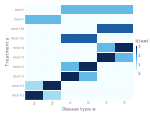

In [3]:
#set up taxonomy example
#include("TaxonomyExample.jl")
#w_vec, w_strings, a_vec, a_strings, p_w, U = setuptaxonomy()
#a_values = a_vec
#w_values = w_vec

#set up medical system example
include("MedicalSystemExample.jl")
w_values, w_strings, a_values, a_strings, p_w, U = setup_medical_example(uniform_w=true)
num_acts = length(a_values)
a_vec = collect(1:num_acts)
num_worldstates = length(w_values)
w_vec = collect(1:num_worldstates)




#pre-compute utilities, find maxima
U_pre, Umax = setuputilityarrays(a_values,w_values,U)

#visualize utility
plt_utility = visualizeMatrix(U_pre, w_values, a_values, w_strings, a_strings, xlabel="Disease type w",
                              ylabel="Treatment a", legendlabel="U(a,w)")

## [Interact] Set parameters for one-step and general case here

Make sure to re-evaluate all the subsequent cells after changing parameters here. The one-step case corresponds to Section 2 of the paper. The general case is found in Section 5 and by choosing certain settings of the inverse temperatures (see Table 2 in the paper), the parallel, serial or even the one-step case can be recovered.

In [4]:
#one-step Blahut-Arimoto
β = 10 #inverse temperature

#general case

#β1=β3 and β2=∞ is identical to the one-variable case
#β1 = β #inverse temperature for p(x)→p(x|w)
#β2 = Inf #inverse temperature for p(a)→p(a|x)
#β3 = β #inverse temperature for p(a|x)→p(a|x,w)

#parallel case: β2=∞
β1 = 15 #inverse temperature for p(x)→p(x|w)
β2 = Inf #17.5 #inverse temperature for p(a)→p(a|x)
β3 = 14.99 #3.999 #inverse temperature for p(a|x)→p(a|x,w)

#sequential case: β3=0
#β1 = 1 #inverse temperature for p(o)→p(x|w)
#β2 = 8 #inverse temperature for p(a)→p(a|x)
#β3 = 0 #inverse temperature for p(a|x)→p(a|x,w)


#cardinality of percept
num_x = 3#length(a_vec) #cardinality of X is equal to action-space


ε = 0.0001 #convergence critetion for BAiterations
maxiter = 2000 #maximum number of BA iterations

2000

# One-step Blahut-Arimoto (rate-distortion) - as in Section 2 of the paper

In [5]:
#solve the example with one-step Blahut-Arimoto

#initialize p(a) uniformly
num_acts = length(a_vec)
pa_init = ones(num_acts)/num_acts 

#Blahut-Arimotot iterations
p_agw_one, p_a_one, perf_df_one = BAiterations(pa_init, β, U_pre, p_w, ε, maxiter,
                                               compute_performance=true, performance_as_dataframe=true)

#visualize solution
plt_marg, plt_cond = visualizeBAsolution(p_a_one, p_agw_one, a_vec, w_vec, a_strings, w_strings,
                                         wlabel="Disease type w", alabel="Treatment a",
                                         legendlabel_marginal="p(a)", legendlabel_conditional="p*(a|w)",
                                         suppress_vis=true);

display(plt_utility)
display(plt_cond)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Disease type w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 3 
 2 
 0 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 U(a,w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Treatment a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Disease type w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Treatment a

# Three-variable general case as in Section 5 of the paper

In [6]:
x_vec = collect(1:num_x)
x_strings = map((x)->"x"*string(x), x_vec)

num_worldstates = length(w_vec)




#This function performs Blahut-Arimoto iterations for the three-variable general case
px, pa, pxgw, pagx, pagxw, pagw, performance_df = threevarBAiterations(num_x, β1, β2, β3, U_pre, p_w, ε, maxiter,
                                                  compute_performance=true, performance_per_iteration=true,
                                                  performance_as_dataframe=true,
                                                  init_pogw_sparse = true, init_pogw_uniformly = false,
                                                  init_pagow_uniformly = true);

### Show convergence behavior of iteration of self consistent equations by inspecting information terms, expected utility and the value of the objective

**! Note that in the legends below $O$ is used instead of $X$**

In [7]:
#plot convergence (i.e. evolution across BA iterations)
plot_convergence_MI, plot_convergence_Util = plot_three_var_BA_convergence(performance_df);

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 Objective J 
 
 
 
 
 
 
 
 E[U] 
 
 
 
 
 
 
 
 
 
 
 Iteration 
 
 
 -2500 
 -2000 
 -1500 
 -1000 
 -500 
 0 
 500 
 1000 
 1500 
 2000 
 2500 
 3000 
 3500 
 4000 
 4500 
 -2000 
 -1900 
 -1800 
 -1700 
 -1600 
 -1500 
 -1400 
 -1300 
 -1200 
 -1100 
 -1000 
 -900 
 -800 
 -700 
 -600 
 -500 
 -400 
 -300 
 -200 
 -100 
 0 
 100 
 200 
 300 
 400 
 500 
 600 
 700 
 800 
 900 
 1000 
 1100 
 1200 
 1300 
 1400 
 1500 
 1600 
 1700 
 1800 
 1900 
 2000 
 2100 
 2200 
 2300 
 2400 
 2500 
 2600 
 2700 
 2800 
 2900 
 3000 
 3100 
 3200 
 3300 
 3400 
 3500 
 3600 
 3700 
 3800 
 3900 
 4000 
 -2000 
 0 
 2000 
 4000 
 -2000 
 -1800 
 -1600 
 -1400 
 -1200 
 -1000 
 -800 
 -600 
 -400 
 -200 
 0 
 200 
 400 
 600 
 800 
 1000 
 1200 
 1400 
 1600 
 1800 
 2000 
 2200 
 2400 
 2600 
 2800 
 3000 
 3200 
 3400 
 3600 
 3800 
 4000 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M20.96,67.01 L 21.02 67 21.08 67 21.14 67 21.21 67 21.27 67 21.33 67 21.39 67 21.45 67 21.51 67 21.57 67 21.63 67 21.69 67 21.75 67 21.82 67 21.88 67 21.94 67 22 67 22.06 67 22.12 67 22.18 67 22.24 67 22.3 67 22.37 67 22.43 67 22.49 67 22.55 67 22.61 67 22.67 67 22.73 67 22.79 67 22.85 67 22.91 67 22.98 67 23.04 67 23.1 67 23.16 67 23.22 67 23.28 67 23.34 67 23.4 67 23.46 67 23.53 67 23.59 67 23.65 67 23.71 67 23.77 67 23.83 67 23.89 67 23.95 67 24.01 67 24.07 67 24.14 67 24.2 67 24.26 67 24.32 67 24.38 67 24.44 67 24.5 67 24.56 67 24.62 67 24.69 67 24.75 67 24.81 67 24.87 67 24.93 67 24.99 67 25.05 67 25.11 67 25.17 67 25.23 67 25.3 67 25.36 67 25.42 67 25.48 67 25.54 67 25.6 67 25.66 67 25.72 67 25.78 67 25.85 67 25.91 67 25.97 67 26.03 67 26.09 67 26.15 67 26.21 67 26.27 67 26.33 67 26.39 67 26.46 67 26.52 67 26.58 67 26.64 67 26.7 67 26.76 67 26.82 67 26.88 67 26.94 67 27 67 27.07 67 27.13 67 27.19 67 27.25 67 27.31 67 27.37 67 27.43 67 27.49 67 27.55 67 27.62 67 27.68 67 27.74 67 27.8 67 27.86 67 27.92 67 27.98 67 28.04 67 28.1 67 28.16 67 28.23 67 28.29 67 28.35 67 28.41 67 28.47 67 28.53 67 28.59 67 28.65 67 28.71 67 28.78 67 28.84 67 28.9 67 28.96 67 29.02 67 29.08 67 29.14 67 29.2 67 29.26 67 29.32 67 29.39 67 29.45 67 29.51 67 29.57 67 29.63 67 29.69 67 29.75 67 29.81 67 29.87 67 29.94 67 30 67 30.06 67 30.12 67 30.18 67 30.24 67 30.3 67 30.36 67 30.42 67 30.48 67 30.55 67 30.61 67 30.67 67 30.73 67 30.79 67 30.85 67 30.91 67 30.97 67 31.03 67 31.1 67 31.16 67 31.22 67 31.28 67 31.34 67 31.4 67 31.46 67 31.52 67 31.58 67 31.64 67 31.71 67 31.77 67 31.83 67 31.89 67 31.95 67 32.01 67 32.07 67 32.13 67 32.19 67 32.26 67 32.32 67 32.38 67 32.44 67 32.5 67 32.56 67 32.62 67 32.68 67 32.74 67 32.8 67 32.87 67 32.93 67 32.99 67 33.05 67 33.11 67 33.17 67 33.23 67 33.29 67 33.35 67 33.42 67 33.48 67 33.54 67 33.6 67 33.66 67 33.72 67 33.78 67 33.84 67 33.9 67 33.96 67 34.03 67 34.09 67 34.15 67 34.21 67 34.27 67 34.33 67 34.39 67 34.45 67 34.51 67 34.58 67 34.64 67 34.7 67 34.76 67 34.82 67 34.88 67 34.94 67 35 67 35.06 67 35.12 67 35.19 67 35.25 67 35.31 67 35.37 67 35.43 67 35.49 67 35.55 67 35.61 67 35.67 67 35.74 67 35.8 67 35.86 67 35.92 67 35.98 67 36.04 67 36.1 67 36.16 67 36.22 67 36.28 67 36.35 67 36.41 67 36.47 67 36.53 67 36.59 67 36.65 67 36.71 67 36.77 67 36.83 67 36.9 67 36.96 67 37.02 67 37.08 67 37.14 67 37.2 67 37.26 67 37.32 67 37.38 67 37.44 67 37.51 67 37.57 67 37.63 67 37.69 67 37.75 67 37.81 67 37.87 67 37.93 67 37.99 67 38.06 67 38.12 67 38.18 67 38.24 67 38.3 67 3

## Solution of general case

**Note that $X$ is labeled here with the general term "Observation" but in case of the medical example it indicates the first diagnosis (or model)**

In [8]:
#call the routine that creates plots for all the probability distributions
plt_px, plt_pa, plt_pxgw, plt_pagx, plt_pagw, dpdown, plt_pagxw_vis = visualize_three_var_BAsolution(px, pa,
                                                                      pxgw, pagx, pagxw, pagw,
                                                                      x_vec, a_vec, w_vec,
                                                                      x_strings, a_strings, w_strings, 
                                                                      olabel_string="x", alabel_string="a", wlabel_string="w")

#visualize p(x) and p(a)
display(hstack(plt_px,plt_pa))

#visualize p(x|w)
display(plt_pxgw)
#visualize p(a|x)
display(plt_pagx)

#visualize p(a|w)
display(plt_pagw)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a 
 
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(x|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 x1 
 x2 
 x3 
 
 
 Observation x

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation x 
 
 
 x1 
 x2 
 x3 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|x) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 Action a

### $p(a|x,w)$ of general case

Interact.Options{:Dropdown,ASCIIString}([Reactive.Input{ASCIIString}] h1,"World state w","h1","h1",Interact.OptionDict(Any["h1","h2","l1","l2","l3","l4"],Dict{Any,Any}("h1"=>"h1","h2"=>"h2","l2"=>"l2","l4"=>"l4","l3"=>"l3","l1"=>"l1")),Any[],Any[])

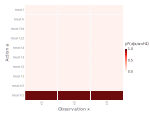

In [9]:
#visualize p(a|x,w)
display(dpdown)  #show the dropdown box to interactively select wk in p(a|x,w=wk)
display(plt_pagxw_vis)

If you see the drowpdown-box but not the plot and ``"Javascript error adding output!"``, try selecting another $w$ with the dropdwon once, then the plot should appear.

If this does not work (i.e. kernel is busy with this cell but nothing ever happens), try ckecking out the most current version of Interact with: `Pkg.checkout("Interact")` in a Julia console. You can undo this and go back to the latest released version with `Pkg.free("Interact")`.

### Performance measures of general case

**! Note that in the legends below $O$ is used instead of $X$**

In [10]:
p_MI, p_composed, p_perf=plot_three_var_performancemeasures(performance_df, maximum(U_pre), β1, β2, β3)

display(hstack(p_MI, p_composed))
display(p_perf)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 H(O) 
 H(A) 
 H(A|O) 
 H(A) 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 H(O|W) 
 H(A|O) 
 H(A|O,W) 
 H(A|W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [bits] 
 
 
 Composition of entropic terms 
 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [bits] 
 
 
 Mutual information terms

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 E[U] 
 E[U] 
 
 
 
 E[U] 
 1/β1 I(O;W)_nats 
 1/β2 I(A;O)_nats 
 1/β3 I(A;W|O)_nats 
 J = E[U] - 1/β ∑ I_nats 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 Utility vs. processing-cost trade-off

# Comparison between one-step case (left) and general case (right)

Whenever the same quantity is shown twice in any of the plots, the left quantity corresponds to the one-step case (denoted by subindex ``_one`` and the right quantity corresponds to the general case.

In [11]:
#compare solution against one-step case

#compare performance measures, EU, J, I(A;W)

util_all = [perf_df_one[end,:E_U], performance_df[end,:E_U],
            perf_df_one[end,:RD_obj], performance_df[end,:Objective_value]]

color_label = ["E[U]_one", "E[U]", "J_one", "J"]

colors = BAdiscretecolorscale(4).f(4)
colscale = Scale.color_discrete_manual(colors[1],colors[1],colors[end],colors[end])

p_perf_comp = plot(x=color_label, y=util_all, color=color_label, Geom.bar(),
                   Guide.ylabel("[utils]"), Guide.xlabel(""), Guide.colorkey(""),
                   Guide.title("One-step solution β=$β vs. \n multi-step β1=$β1, β2=$β2, β3 = $β3"),
                   colscale, Scale.y_continuous(minvalue=0, maxvalue=maximum(U_pre)),
                   BAtheme(key_position = :none))


#compare mutual informations I(A;W)
MI_comp = [perf_df_one[end,:I_aw], performance_df[end,:I_aw]]
color_label = ["I(A;W)_one", "I(A;W)"]

colors = Scale.color_discrete_hue().f(4)
colscale = Scale.color_discrete_manual(colors[end],colors[end])

p_perf_comp_MI = plot(x=color_label, y=MI_comp, color=color_label, Geom.bar(),
                      Guide.ylabel("[bits]"), Guide.xlabel(""), Guide.colorkey(""),
                      Guide.title("I(A;W) for β=$β vs. \n multi-step β1=$β1, β2=$β2, β3 = $β3"),
                      colscale, Scale.y_continuous(minvalue=0), BAtheme(key_position = :none))

display(hstack(p_perf_comp,p_perf_comp_MI))

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 I(A;W)_one 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [bits] 
 
 
 I(A;W) for β=10 vs. multi-step β1=15, β2=Inf, β3 = 14.99 
 
 
 
 
 E[U]_one 
 E[U] 
 J_one 
 J 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 One-step solution β=10 vs. multi-step β1=15, β2=Inf, β3 = 14.99

## Compare overall behavior $p(a|w)$

Top: one-step case
Bottom: general case

In [12]:
#compare solutions p(a|w)
plt_cond_one = visualizeBAconditional(p_agw_one, a_vec, w_vec, a_strings, w_strings,
                                      wlabel="w", alabel="a",legendlabel="p*(a|w)_one")

plt_cond_multi = visualizeBAconditional(pagw, a_vec, w_vec, a_strings, w_strings,
                                         wlabel="w", alabel="a",legendlabel="p*(a|w)")

display(plt_cond_one)
display(plt_cond_multi)


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w)_one 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 w 
 
 
 h1 
 h2 
 l1 
 l2 
 l3 
 l4 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 treat h1 
 treat h2 
 treat l1 
 treat l2 
 treat l3 
 treat l4 
 treat l12 
 treat l34 
 treat h 
 treat l 
 
 
 a

### Difference between both final solutions

"Difference: norm(p*(a|w)_one - p*(a|w))=6.118579364179004e-5"

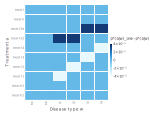

In [13]:
display("Difference: norm(p*(a|w)_one - p*(a|w))=$(norm(p_agw_one-pagw))")

plt_cond_diff = visualizeMatrix(p_agw_one - pagw, w_vec, a_vec, w_strings, a_strings,
                                xlabel="Disease type w", ylabel="Treatment a",legendlabel="p*(a|w)_one - p*(a|w)")

## Compose final plot for paper

**! Note that in the legends below $O$ is used instead of $X$**

In [14]:
#for the paper
plt_final = vstack((hstack(plt_cond_multi, p_perf_comp_MI )), hstack(p_MI, p_perf_comp))
display(plt_final)

w = 18cm
h = 15cm
#draw(SVG("Figures/Hierarchical_OneStep_Comparison.svg", w, h), plt_final) #uncomment to store figure#


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 E[U]_one 
 E[U] 
 J_one 
 J 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 One-step solution β=10 vs. multi-step β1=15, β2=Inf, β3 = 14.99 
 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [bits] 
 
 
 Mutual information terms 
 
 
 
 
 I(A;W)_one 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -

Compose.Measure{Compose.MeasureNil,Compose.MeasureNil}(150.0,Compose.MeasureNil(),Compose.MeasureNil(),0.0,0.0)